# Домашнее задание №1

Задание выполнил(а): ```Соломенцев Александр```

__Дата выдачи:__ 19.12.2020

__Дедлайн:__ 27.12.2020 23:59

# О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками `numpy`, `pandas` и `matplotlib`.

### Оценивание и штрафы

Каждое из 14 заданий весит 1 бал:
#### Numpy
* [Задание 1](#task1) [1 бал]
* [Задание 2](#task2) [1 бал]
* [Задание 3](#task3) [1 бал]
* [Задание 4](#task4) [1 бал]
* [Задание 5](#task5) [1 бал]

#### Pandas
* [Задание 6](#task6) [1 бал]
* [Задание 7](#task7) [1 бал]
* [Задание 8](#task8) [1 бал]
* [Задание 9](#task9) [1 бал]
* [Задание 10](#task10) [1 бал]
* [Задание 11](#task11) [1 бал]
* [Задание 12](#task12) [1 бал]

#### Matplotlib
* [Задание 13](#task13) [1 бал]
* [Задание 14](#task14) [1 бал]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

```TBA```

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах этой части необходимо написать код решения внутри функции и проверить его работу на приведенных для вашего удобства тестах.

При решении задач можно использовать только библиотеку `numpy`. Запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде предполагается, что массив - это одномерный `numpy.array`, а матрица - это двумерный `numpy.array`. 

### Задание 1 <a id="task1"></a>

Создайте массив первых n нечетных натуральных чисел, записанных в порядке убывания. Например, если `n=5`, то ответом будет `array([9, 7, 5, 3, 1])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [2]:
def first_even_numbers(n: int) -> np.array:
    return np.arange(n * 2 - 1, 0, -2)

In [3]:
assert np.allclose(first_even_numbers(5), np.array([9, 7, 5, 3, 1]))
assert np.allclose(first_even_numbers(1), np.array([1]))
assert np.allclose(first_even_numbers(10), np.array([19, 17, 15, 13, 11, 9, 7, 5, 3, 1]))

### Задание 2 <a id="task2"></a>

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [4]:
def change_array(array: np.array, number: int) -> np.array:
    for i in np.arange(0, len(array), 3):
        array[i] = number
    return array

In [5]:
array1 = np.array([3, 5, 1, 0, -3, 22, 213436])
number1 = -111
assert np.allclose(change_array(array1, number1), np.array([-111, 5, 1, -111, -3, 22, -111]))

array2 = np.array([3, 14, 15, 92, 6])
number2 = 8
assert np.allclose(change_array(array2, number2), np.array([8, 14, 15, 8, 6]))

### Задание 3 <a id="task3"></a>

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

_Функции, которые могут пригодиться при решении: `.mean()`, `.std()`, `.nan_to_num()`_

In [6]:
def normalize(matrix: np.array) -> np.array:
    matrix = matrix.astype(float)
    for _ in range(matrix.shape[1]):
        matrix[:, _] = np.nan_to_num( (matrix[:, _] - matrix[:, _].mean()) / matrix[:, _].std() )
    return matrix

In [7]:
matrix1 = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
assert np.allclose(
    normalize(matrix1),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
matrix2 = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])
assert np.allclose(
    normalize(matrix2),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)
matrix3 = np.array([[0.1, 0.2, 0.3, 0.4], [0.1, 0.5, 0.6, 0.7]])
assert np.allclose(
    normalize(matrix3),
    np.array([[0, -1, -1, -1], [0, 1, 1, 1]])
)

/var/folders/l3/413_5fb13_gbwljv15vg8kqm0000gn/T/ipykernel_44027/2997530168.py:4: RuntimeWarning: invalid value encountered in true_divide
  matrix[:, _] = np.nan_to_num( (matrix[:, _] - matrix[:, _].mean()) / matrix[:, _].std() )


### Задание 4 <a id="task4"></a>

Напишите функцию, вычисляющую производную данного полинома. Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([12, 12, 0])`, соответствующий полиному $12x^2 + 12x$.

_Функции, которые могут пригодиться при решении: `.arange()`_

In [8]:
def derivative(coefs: np.array) -> np.array:
    return coefs[:-1] * np.arange(len(coefs)-1, 0, -1)

In [9]:
coefs1 = np.array([4, 6, 0, 1])
assert np.allclose(
    derivative(coefs1),
    np.array([12, 12, 0])
)

coefs2 = np.array([1, 7, -12, 21, -6])
assert np.allclose(
    derivative(coefs2),
    np.array([4, 21, -24, 21])
)

### Задание 5 <a id="task5"></a>

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

_Функции, которые могут пригодиться при решении: `.T`, `.identity()`, `.diagonal`_

In [10]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix.T | matrix

In [11]:
matrix1 = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix1),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

matrix2 = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix2),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

## Часть 2. Pandas

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

### Задание 6 <a id="task6"></a>

Откройте в ноутбуке файл с данными (["train.csv"](https://raw.githubusercontent.com/AKuzina/ml_dpo/main/hw/train.csv)). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [13]:
df_titanic = pd.read_csv('train.csv', sep=',')
df_titanic.iloc[np.r_[0:5, -5:0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Задание 7 <a id="task7"></a>

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [14]:
res = df_titanic.Survived.groupby(by=df_titanic.Sex).sum() / df_titanic.Survived.groupby(by=df_titanic.Sex).count()
print(f'Доля выживших женщин составялет {res.female * 100}%, доля выживших мужчин – {res.male * 100}%.')

Доля выживших женщин составялет 74.20382165605095%, доля выживших мужчин – 18.890814558058924%.


### Задание 8 <a id="task8"></a>

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [15]:
min_price, average_price, max_price = df_titanic.Fare.describe().loc[['min','mean', 'max']]
print(f'''Имеются следующие данные о ценах, которые заплатили пассажиры: 
– минимальная {min_price},
– средняя {average_price},
– максимальная {max_price}.\n''')

min_price_S, average_price_S, max_price_S = df_titanic.Fare[df_titanic.Embarked == "S"].describe().loc[['min','mean', 'max']]
print(f'''Имеются следующие данные о ценах, которые заплатили пассажиры:
– минимальная {min_price_S},
– средняя {average_price_S},
– максимальная {max_price_S}.\n''')

Имеются следующие данные о ценах, которые заплатили пассажиры: 
– минимальная 0.0,
– средняя 32.2042079685746,
– максимальная 512.3292.

Имеются следующие данные о ценах, которые заплатили пассажиры:
– минимальная 0.0,
– средняя 27.07981180124218,
– максимальная 263.0.



### Задание 9 <a id="task9"></a>

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [16]:
# Колонки 1) Name и 2) Ticket не несут в себе полезную информацию
# 1) так как все значения скорее всего уникальны
# 2) так как номера билетов могут быть как численными, так и символьными, что не очень релевантно для модели 

df_titanic.drop(columns=['Name', 'Ticket'], inplace=True)  
df_titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,51.8625,E46,S
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,30.0708,NaN,C


### Задание 10 <a id="task10"></a>

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [17]:
if df_titanic.isna().sum().max() > 0:
    print('В данных есть пропуски:')
    res = [i for i in df_titanic.isna().sum().index if df_titanic.isna().sum()[i] > 0]
    print(*res, sep='\n')
    miss = df_titanic[res].isna().sum() / df_titanic.shape[0] * 100
    for _ in miss.index:
        print(f'В столбцe {_} отсутсвует {miss[_]}% данных.')

В данных есть пропуски:
Age
Cabin
Embarked
В столбцe Age отсутсвует 19.865319865319865% данных.
В столбцe Cabin отсутсвует 77.10437710437711% данных.
В столбцe Embarked отсутсвует 0.22446689113355783% данных.


### Задание 11 <a id="task11"></a>

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [18]:
# Заполнить данные в столбце Age целесообразно мединными значениями
df_titanic.Age.fillna(value=df_titanic.Age.median(), inplace=True)

# Заполнить данные в столбце Cabin целесообразно нулями или просто символом '–'
df_titanic.Cabin.fillna(value='–', inplace=True)

# Заполнить данные в столбце Embanked наиболее часто встречающимся значением 'S'
df_titanic.Embarked.fillna(value=df_titanic.groupby('Embarked').Survived.count().idxmax(), inplace=True)

# Проверка пропусков
assert df_titanic.isna().sum().max() == 0

### Задание 12 <a id="task12"></a>

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. 

In [19]:
df_titanic['family'] = 1 + df_titanic.SibSp + df_titanic.Parch
df_titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family
0,1,0,3,male,22.0,1,0,7.2500,–,S,2
1,2,1,1,female,38.0,1,0,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,7.9250,–,S,1
3,4,1,1,female,35.0,1,0,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,8.0500,–,S,1
5,6,0,3,male,28.0,0,0,8.4583,–,Q,1
6,7,0,1,male,54.0,0,0,51.8625,E46,S,1
7,8,0,3,male,2.0,3,1,21.0750,–,S,5
8,9,1,3,female,27.0,0,2,11.1333,–,S,3
9,10,1,2,female,14.0,1,0,30.0708,–,C,2


# Часть 3. Matplotlib

### Задание 13 <a id="task13"></a>

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию [`plt.subplots`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html).

* Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots` 
* Используйте функции `set_xlabel`, `set_ylabel`, `set_title` чтобы добавить подписи осей и названия графикам
* Для построения гистограммы используйте функуию [`hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
* Каждая гистограмма должна быть нормирована (полезными могут оказаться параметры `density`)


В итоге ваш график должен выглядеть примерно так

![](plot_13.png)

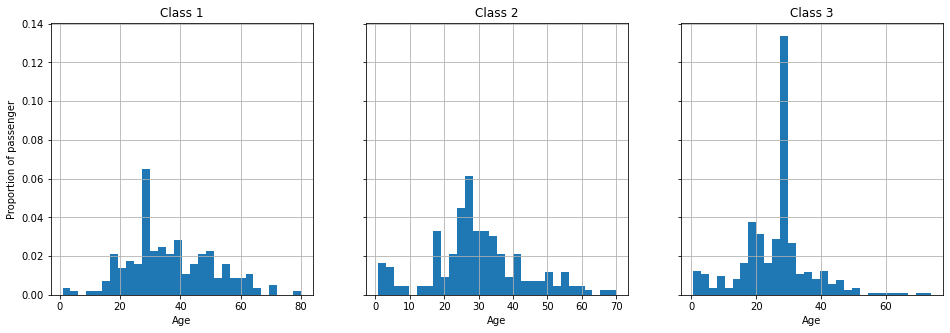

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,5), sharey=True)

ax1.set_title("Class 1")
ax1.hist(df_titanic.Age[df_titanic.Pclass == 1], density=True, bins=30)
ax1.set_ylabel('Proportion of passenger')
ax1.set_xlabel('Age')


ax2.set_title("Class 2")
ax2.hist(df_titanic.Age[df_titanic.Pclass == 2], density=True, bins=30)
ax2.set_xlabel('Age')


ax3.set_title("Class 3")
ax3.hist(df_titanic.Age[df_titanic.Pclass == 3], density=True, bins=30)
ax3.set_xlabel('Age')

for ax in ax1, ax2, ax3:
    ax.grid(True, )

plt.show()

### Задание 14 <a id="task14"></a>

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. 

* Обозначьте выживших и погибших пассажиров (`Survived`) разными цветами (аргумент `c` функции `scatter`) и маркерами (аргумент `c` функции `marker`). 
* Также укажите на графике легенду (функция [`plt.legend`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html))
* Используйте аргумент `fontsize`, чтобы регулировать размер шрифта в подписях

В итоге ваш график должен выглядеть примерно так

![](plot_14.png)

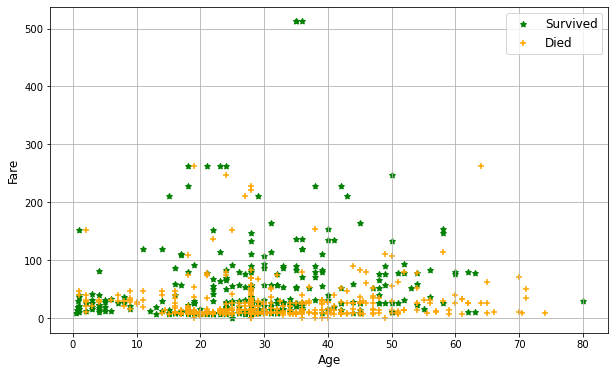

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df_titanic.Age[df_titanic.Survived == 1], df_titanic.Fare[df_titanic.Survived == 1], c='green', marker=(5, 1))
plt.scatter(df_titanic.Age[df_titanic.Survived == 0], df_titanic.Fare[df_titanic.Survived == 0], c='orange', marker="+")
plt.legend(['Survived', 'Died'], fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid(True)

plt.show()